<a href="https://colab.research.google.com/github/Arpan-18/Satelite-image-clustering/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import gdown

In [ ]:
# url for my folder containing the files
# url = "https://drive.google.com/drive/folders/1AgXvDO8YvoMTf_jEnFxxXsjOsen7PnQe?usp=sharing"

Extracting the points

In [ ]:
def process_image(image_path):
    img = cv2.imread(image_path)
    gr = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    _,binary = cv2.threshold(gr,240,255,cv2.THRESH_BINARY)
    contours,_ = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    points = []
    for contour in contours:
        for point in contour.squeeze():
            points.append(point)
    return points

##IMG_1

In [ ]:
url = 'https://drive.google.com/drive/folders/19VGzq3m0XPonazP5NhnjJdNfdGpixu6_?usp=drive_link'
output_dir_1 = 'train_images'

gdown.download_folder(url, output=output_dir_1, quiet=False)

# Update the train_dir variable
train_dir = output_dir_1



# train_dir = 'https://drive.google.com/drive/folders/IMG_1'
all_points = []

for filename in os.listdir(train_dir):
    if filename.endswith('.png'):
        image_path = os.path.join(train_dir,filename)
        points = process_image(image_path)
        all_points.extend(points)

Retrieving folder contents


Processing file 1_y6UMljEyy2WnZVTXIn3KsViseph8Rwa 1.png


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1_y6UMljEyy2WnZVTXIn3KsViseph8Rwa
To: /content/train_images/1.png
100%|██████████| 576/576 [00:00<00:00, 1.76MB/s]
Download completed


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
all_points

[45,
 46,
 array([40, 44], dtype=int32),
 array([41, 44], dtype=int32),
 38,
 44,
 43,
 43,
 36,
 43,
 array([46, 41], dtype=int32),
 array([46, 42], dtype=int32),
 19,
 41,
 15,
 40,
 33,
 39,
 21,
 38,
 array([17, 38], dtype=int32),
 array([18, 39], dtype=int32),
 47,
 37,
 array([38, 35], dtype=int32),
 array([39, 36], dtype=int32),
 array([37, 38], dtype=int32),
 array([36, 38], dtype=int32),
 array([36, 39], dtype=int32),
 array([39, 36], dtype=int32),
 10,
 35,
 array([41, 34], dtype=int32),
 array([41, 35], dtype=int32),
 array([42, 36], dtype=int32),
 array([42, 37], dtype=int32),
 array([41, 38], dtype=int32),
 array([40, 38], dtype=int32),
 array([37, 41], dtype=int32),
 array([39, 41], dtype=int32),
 array([39, 40], dtype=int32),
 array([41, 38], dtype=int32),
 array([43, 40], dtype=int32),
 array([42, 41], dtype=int32),
 array([41, 41], dtype=int32),
 array([41, 42], dtype=int32),
 array([44, 39], dtype=int32),
 array([44, 37], dtype=int32),
 array([45, 36], dtype=int32),
 

list to suitable array-type convertion

In [ ]:
def to_np_array(elem):
    if isinstance(elem, np.ndarray):
        return elem
    elif isinstance(elem, (list, tuple)):
        return np.array(elem, dtype=int)
    else:
        return np.array([elem], dtype=int)

# Convert each element into array-type
formatted_data = [to_np_array(elem) for elem in all_points]



def pair_lone_numbers(data):
    formatted_data_2= []
    i = 0
    while i < len(data):
        if isinstance(data[i], np.ndarray) and len(data[i]) == 1:
            if i + 1 < len(data) and isinstance(data[i + 1], np.ndarray) and len(data[i + 1]) == 1:
                formatted_data_2.append(np.array([data[i][0], data[i + 1][0]], dtype=int))
                i += 2
            else:
                raise ValueError("Single-element array found without a pair.")
        elif isinstance(data[i], np.ndarray):
            formatted_data_2.append(data[i])
            i += 1
        elif isinstance(data[i], int):
            if i + 1 < len(data) and isinstance(data[i + 1], int):
                formatted_data_2.append(np.array([data[i], data[i + 1]], dtype=int))
                i += 2
            else:
                raise ValueError("Single integer found without a pair.")
        else:
            raise ValueError("Unsupported data type found.")
    return formatted_data_2

formatted_data_2 = pair_lone_numbers(formatted_data)



Visualizing the points

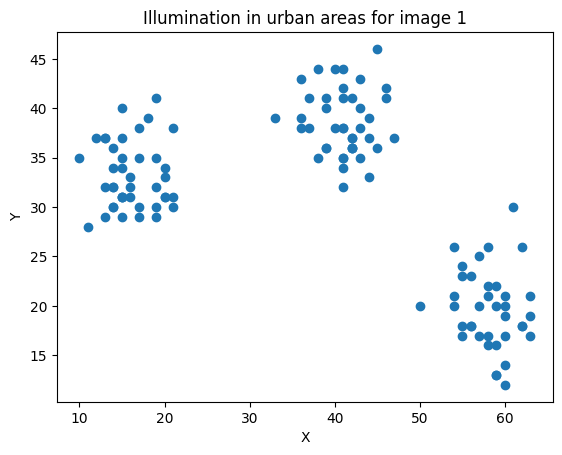

In [ ]:


coordinates = np.array(formatted_data_2)
plt.scatter(coordinates[:, 0], coordinates[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Illumination in urban areas for image 1')
plt.show()

## KMeans Clustering Algo

In [ ]:
def find_closest_centroids(X, centroids):

    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] = np.argmin(distance)

    return idx

In [ ]:
def compute_centroids(X, idx, K):

    m, n = X.shape
    centroids = np.zeros((K, n))

    for k in range(K):
          points = points = X[idx == k]
          centroids[k] = centroids[k] = np.mean(points, axis = 0)

    return centroids

##Elbow method

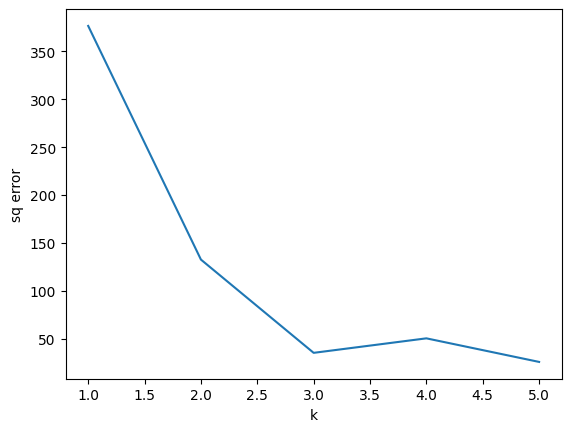

In [ ]:
def calculate_cost(X , centroids, idx):
    m, _ = X.shape
    cost = 0
    # indices = np.unique(idx)
    for index in range(centroids.shape[0]):
        pt = X[idx==index]
        centroid = centroids[index]
        for point in pt:
            cost += np.linalg.norm( point - centroid) **2
    return cost/m

def initialize_centeroids(k,iter = 1000):
    sum_x = np.zeros(k)
    sum_y = np.zeros(k)

    for i in range(iter):
        x_coor = np.random.uniform(20,55,k)
        y_coor = np.random.uniform(20,37,k)
        sum_x += x_coor
        sum_y += y_coor
    x_avg = sum_x/iter
    y_avg = sum_y/iter

    centroidS = np.column_stack((x_avg,y_avg))

    return centroidS

k_rng = range(1,6)
costs = []

for k in k_rng:
    Initial_centroids = initialize_centeroids(k)
    idx = find_closest_centroids(coordinates,Initial_centroids)
    centroids = compute_centroids(coordinates, idx , k)
    cost = calculate_cost(coordinates, centroids, idx)
    costs.append(cost)



plt.xlabel('k')
plt.ylabel('sq error')
plt.plot(k_rng,costs)

#Observing the Graph and manuall observation of the datapoints
## K Should be 3

In [ ]:
initial_centroids = np.array([[18, 35],[42, 40],[60, 20]])  #guessing manually seeing the graph
idx = find_closest_centroids(coordinates, initial_centroids)

In [ ]:
K = 3
centroids = compute_centroids(coordinates, idx, K)

print("The centroids are:", centroids)


The centroids are: [[16.12195122 33.14634146]
 [41.         38.56097561]
 [58.16216216 19.67567568]]


In [ ]:
distances = np.linalg.norm(coordinates[:, np.newaxis] - centroids, axis=2)

# assigning each data point to the cluster with the minimum distance
cluster_labels = np.argmin(distances, axis=1)

print("Cluster Labels:", cluster_labels)

Cluster Labels: [1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


In [ ]:
df = pd.DataFrame(coordinates)
df['cluster'] = cluster_labels

In [ ]:
df

,0,1,cluster
0,45,46,1
1,40,44,1
2,41,44,1
3,38,44,1
4,43,43,1
...,...,...,...
114,59,16,2
115,60,12,2
116,59,13,2
117,60,14,2


Clustering visualization

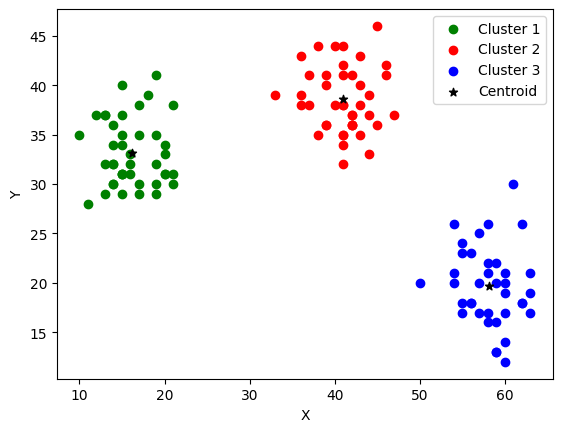

In [ ]:
# Assuming df1, df2, and df3 are slices of your DataFrame for different clusters
plt.scatter(df[df['cluster'] == 0][0], df[df['cluster'] == 0][1], color='green', label='Cluster 1')
plt.scatter(df[df['cluster'] == 1][0], df[df['cluster'] == 1][1], color='red', label='Cluster 2')
plt.scatter(df[df['cluster'] == 2][0], df[df['cluster'] == 2][1], color='blue', label='Cluster 3')


plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='*', label='Centroid')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Calculating distance

In [ ]:
#calculating distance
p = np.array(centroids)
point_1 = p[0]
point_2 = p[1]
point_3 = p[2]

a = np.sqrt(np.sum((point_1 - point_2)**2))
b = np.sqrt(np.sum((point_2 - point_3)**2))
c = np.sqrt(np.sum((point_1 - point_3)**2))

In [ ]:
Distance = np.array([a,b,c])
Clusters = np.array(["cluster_1 and cluster_2","cluster_2 and cluster_3","cluster_1 and cluster_3"])
dict = {'Clusters' : ["cluster_1 and cluster_2","cluster_2 and cluster_3","cluster_1 and cluster_3"],
        'Distances' : [a ,b, c]}

Table = pd.DataFrame(dict)

print(Table)


                  Clusters  Distances
0  cluster_1 and cluster_2  25.460471
1  cluster_2 and cluster_3  25.518510
2  cluster_1 and cluster_3  44.145647


## for IMG 2

In [ ]:
url_2 = 'https://drive.google.com/drive/folders/18mULKIjVRFXH6gEj5AdEkK1oZ7pYuA7p?usp=sharing'
output_dir_2 = 'train_images_2'

gdown.download_folder(url_2, output=output_dir_2, quiet=False)


train_dir_2 = output_dir_2

# train_dir_2 = 'IMG_22'
all_points_2 = []

for filename in os.listdir(train_dir_2):
    if filename.endswith('.png'):
        image_path_2 = os.path.join(train_dir_2,filename)
        points_2 = process_image(image_path_2)
        all_points_2.extend(points_2)

Retrieving folder contents


Processing file 1EFq08RjJn1NlWbcIBFfVYCMruCM8ZBt_ Rotated_img_2.png


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1EFq08RjJn1NlWbcIBFfVYCMruCM8ZBt_
To: /content/train_images_2/Rotated_img_2.png
100%|██████████| 428/428 [00:00<00:00, 1.19MB/s]
Download completed


editing the image

In [ ]:
# path_2 = 'IMG_2/2.png'
# img_44 = cv2.imread(path_2)

# angle_2 = -180
# height_2, width_2 = img_44.shape[:2]
# center_2 = (width_2/2, height_2/2)

# rotation_matrix_2 = cv2.getRotationMatrix2D(center_2, angle_2, 1.0)
# rotated_img_2 = cv2.warpAffine(img_44, rotation_matrix_2, (width_2, height_2))

# # cv2.imwrite("Rotated_img_2.png",rotated_img_2)
# # cv2.imshow('Image',rotated_img_2)
# # cv2.waitKey(0)

In [ ]:
all_points_2

[39,
 43,
 36,
 43,
 29,
 43,
 33,
 42,
 28,
 41,
 array([35, 39], dtype=int32),
 array([36, 40], dtype=int32),
 array([35, 41], dtype=int32),
 array([36, 40], dtype=int32),
 array([37, 41], dtype=int32),
 array([38, 41], dtype=int32),
 array([39, 40], dtype=int32),
 array([38, 40], dtype=int32),
 array([37, 41], dtype=int32),
 array([31, 38], dtype=int32),
 array([30, 39], dtype=int32),
 28,
 36,
 41,
 34,
 array([39, 34], dtype=int32),
 array([38, 35], dtype=int32),
 array([38, 36], dtype=int32),
 array([37, 37], dtype=int32),
 array([36, 36], dtype=int32),
 array([34, 36], dtype=int32),
 array([33, 37], dtype=int32),
 array([32, 36], dtype=int32),
 array([33, 37], dtype=int32),
 array([33, 39], dtype=int32),
 array([33, 38], dtype=int32),
 array([34, 37], dtype=int32),
 array([37, 37], dtype=int32),
 array([38, 38], dtype=int32),
 array([39, 37], dtype=int32),
 array([40, 38], dtype=int32),
 array([39, 37], dtype=int32),
 array([39, 36], dtype=int32),
 array([38, 35], dtype=int32),


In [ ]:
formatted_data_3 = [to_np_array(elem) for elem in all_points_2]
formatted_data_4 = pair_lone_numbers(formatted_data_3)


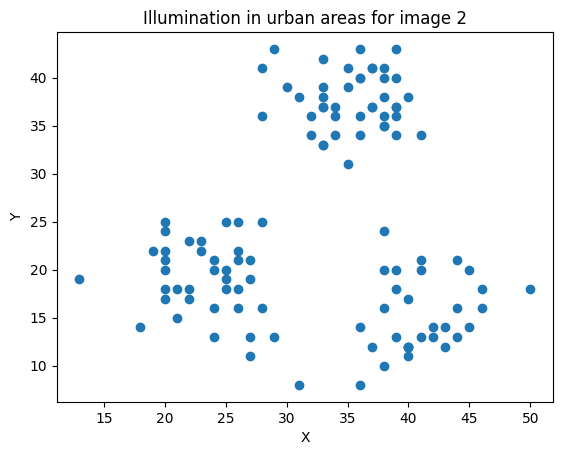

In [ ]:
coordinates_2 = np.array(formatted_data_4)
plt.scatter(coordinates_2[:, 0], coordinates_2[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Illumination in urban areas for image 2')


plt.show()

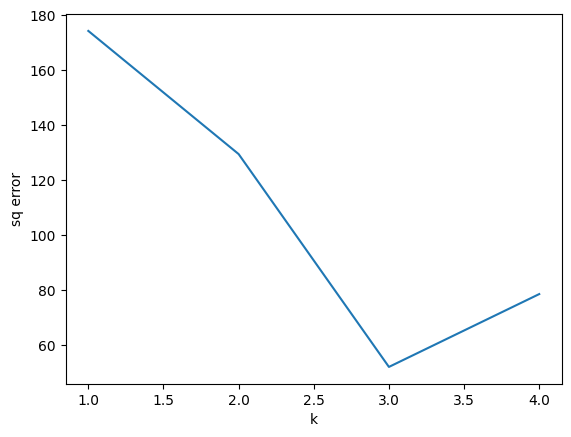

In [ ]:
def initialize_centeroids_2(k,iter = 3000):
    sum_x = np.zeros(k)
    sum_y = np.zeros(k)

    for i in range(iter):
        x_coor = np.random.uniform(20,40,k)
        y_coor = np.random.uniform(25,45,k)
        sum_x += x_coor
        sum_y += y_coor
    x_avg = sum_x/iter
    y_avg = sum_y/iter

    centroidS = np.column_stack((x_avg,y_avg))

    return centroidS

k_rng_2 = range(1,5)
costs_2 = []

for k in k_rng_2:
    Initial_centroids_2 = initialize_centeroids_2(k)
    idx_2 = find_closest_centroids(coordinates_2,Initial_centroids_2)
    centroids_2 = compute_centroids(coordinates_2, idx_2 , k)
    cost_2 = calculate_cost(coordinates_2, centroids_2, idx_2)
    costs_2.append(cost_2)



plt.xlabel('k')
plt.ylabel('sq error')
plt.plot(k_rng_2,costs_2)

#Observing the Graph and manuall observation of the datapoints
## K Should be 3

In [ ]:
initial_centroids_2 = np.array([[22, 17],[35, 35],[43, 15]])  #guessing manually seeing the graph
idx_2 = find_closest_centroids(coordinates_2, initial_centroids_2)

K = 3
centroids_2 = compute_centroids(coordinates_2, idx_2, K)

print("The centroids are:", centroids_2)

distances_2 = np.linalg.norm(coordinates_2[:, np.newaxis] - centroids_2, axis=2)

# assigning each data point to the cluster with the minimum distance
cluster_labels_2 = np.argmin(distances_2, axis=1)

print("Cluster Labels:", cluster_labels_2)

df_2 = pd.DataFrame(coordinates_2)
df_2['cluster'] = cluster_labels_2


The centroids are: [[23.52631579 18.89473684]
 [35.3255814  37.60465116]
 [41.16666667 15.4       ]]
Cluster Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 2 0 0 2 2 2 2 2 2 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2]


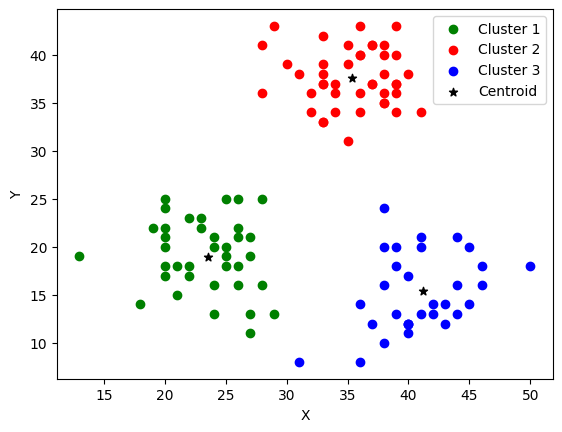

In [ ]:


plt.scatter(df_2[df_2['cluster'] == 0][0], df_2[df_2['cluster'] == 0][1], color='green', label='Cluster 1')
plt.scatter(df_2[df_2['cluster'] == 1][0], df_2[df_2['cluster'] == 1][1], color='red', label='Cluster 2')
plt.scatter(df_2[df_2['cluster'] == 2][0], df_2[df_2['cluster'] == 2][1], color='blue', label='Cluster 3')


plt.scatter(centroids_2[:, 0], centroids_2[:, 1], color='black', marker='*', label='Centroid')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
#calculating distance
p_2 = np.array(centroids_2)
point_1_2 = p_2[0]
point_2_2 = p_2[1]
point_3_2 = p_2[2]

a_2 = np.sqrt(np.sum((point_1_2 - point_2_2)**2))
b_2 = np.sqrt(np.sum((point_2_2 - point_3_2)**2))
c_2 = np.sqrt(np.sum((point_1_2 - point_3_2)**2))

Distance_2 = np.array([a_2,b_2,c_2])
Clusters_2 = np.array(["cluster_1 and cluster_2","cluster_2 and cluster_3","cluster_1 and cluster_3"])
dict_2 = {'Clusters' : ["cluster_1 and cluster_2","cluster_2 and cluster_3","cluster_1 and cluster_3"],
        'Distances' : [a_2 ,b_2, c_2]}

Table = pd.DataFrame(dict_2)

print(Table)

                  Clusters  Distances
0  cluster_1 and cluster_2  22.119755
1  cluster_2 and cluster_3  22.960070
2  cluster_1 and cluster_3  17.983191


## IMG_3


In [ ]:
url_3 = 'https://drive.google.com/drive/folders/1NqDL-52w9N_OTo4EwIXkfh26I_j9s4Xf?usp=sharing'
output_dir_3 = 'train_images_3'

gdown.download_folder(url_3, output=output_dir_3, quiet=False)


train_dir_3 = output_dir_3


# train_dir_3 = 'IMG_3'
all_points_3 = []

for filename in os.listdir(train_dir_3):
    if filename.endswith('.png'):
        image_path = os.path.join(train_dir_3,filename)
        points = process_image(image_path)
        all_points_3.extend(points)

Retrieving folder contents


Processing file 1Y36fIRLIazC-3Uq5_q34gah3HndE8iNE 3.png


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1Y36fIRLIazC-3Uq5_q34gah3HndE8iNE
To: /content/train_images_3/3.png
100%|██████████| 619/619 [00:00<00:00, 1.61MB/s]
Download completed


In [ ]:
# all_points_3

In [ ]:
formatted_data_5 = [to_np_array(elem) for elem in all_points_3]
formatted_data_6 = pair_lone_numbers(formatted_data_5)

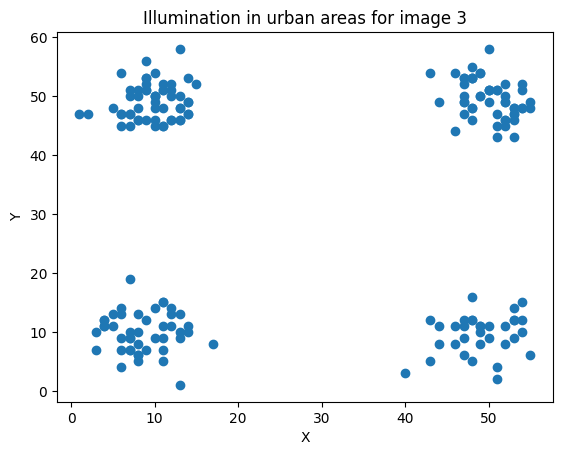

In [ ]:
coordinates_3 = np.array(formatted_data_6)
plt.scatter(coordinates_3[:, 0], coordinates_3[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Illumination in urban areas for image 3')

plt.show()

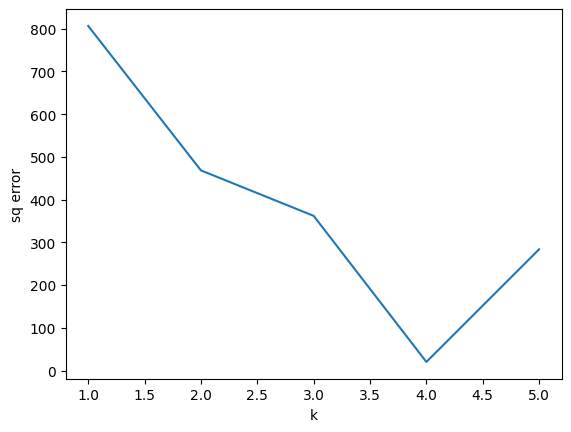

In [ ]:
def initialize_centeroids_3(k,iter = 3000):
    sum_x = np.zeros(k)
    sum_y = np.zeros(k)

    for i in range(iter):
        x_coor = np.random.uniform(20,45,k)
        y_coor = np.random.uniform(20,45,k)
        sum_x += x_coor
        sum_y += y_coor
    x_avg = sum_x/iter
    y_avg = sum_y/iter

    centroidS = np.column_stack((x_avg,y_avg))

    return centroidS

k_rng_3 = range(1,6)
costs_3 = []

for k in k_rng_3:
    Initial_centroids = initialize_centeroids_3(k)
    idx = find_closest_centroids(coordinates_3,Initial_centroids)
    centroids = compute_centroids(coordinates_3, idx , k)
    cost = calculate_cost(coordinates_3, centroids, idx)
    costs_3.append(cost)



plt.xlabel('k')
plt.ylabel('sq error')
plt.plot(k_rng_3,costs_3)

#Observing the Graph and manuall observation of the datapoints
## K Should be 4

In [ ]:
initial_centroids_3 = np.array([[10, 10],[10, 50],[50, 10],[50, 49]])  #guessing manually seeing the graph
idx_3 = find_closest_centroids(coordinates_3, initial_centroids_3)

K_3 = 4
centroids_3 = compute_centroids(coordinates_3, idx_3, K_3)

print("The centroids are:", centroids_3)

distances_3 = np.linalg.norm(coordinates_3[:, np.newaxis] - centroids_3, axis=2)

# assigning each data point to the cluster with the minimum distance
cluster_labels_3 = np.argmin(distances_3, axis=1)

print("Cluster Labels:", cluster_labels_3)

df_3 = pd.DataFrame(coordinates_3)
df_3['cluster'] = cluster_labels_3


The centroids are: [[ 8.64444444  9.93333333]
 [ 9.8        49.09090909]
 [49.          9.57575758]
 [50.05882353 49.54901961]]
Cluster Labels: [3 1 1 3 1 1 1 3 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 2 2 2 0
 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0]


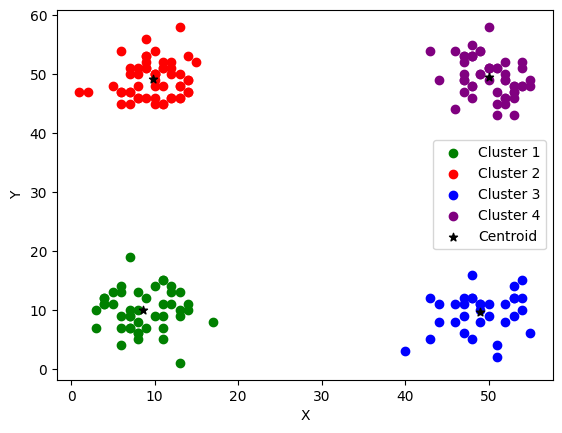

In [ ]:
plt.scatter(df_3[df_3['cluster'] == 0][0], df_3[df_3['cluster'] == 0][1], color='green', label='Cluster 1')
plt.scatter(df_3[df_3['cluster'] == 1][0], df_3[df_3['cluster'] == 1][1], color='red', label='Cluster 2')
plt.scatter(df_3[df_3['cluster'] == 2][0], df_3[df_3['cluster'] == 2][1], color='blue', label='Cluster 3')
plt.scatter(df_3[df_3['cluster'] == 3][0], df_3[df_3['cluster'] == 3][1], color='purple', label='Cluster 4')


plt.scatter(centroids_3[:, 0], centroids_3[:, 1], color='black', marker='*', label='Centroid')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
#calculating distance
p_3 = np.array(centroids_3)
point_1_3 = p_3[0]
point_2_3 = p_3[1]
point_3_3 = p_3[2]
point_4_3 = p_3[3]

a_3 = np.sqrt(np.sum((point_1_3 - point_2_3)**2))
b_3 = np.sqrt(np.sum((point_2_3 - point_3_3)**2))
c_3 = np.sqrt(np.sum((point_1_3 - point_3_3)**2))
d_3 = np.sqrt(np.sum((point_1_3 - point_4_3)**2))
e_3 = np.sqrt(np.sum((point_2_3 - point_4_3)**2))
f_3 = np.sqrt(np.sum((point_3_3 - point_4_3)**2))

Distance_3 = np.array([a_3,b_3,c_3,d_3,e_3,f_3])
Clusters_3 = np.array(["cluster_1 and cluster_2","cluster_2 and cluster_3","cluster_1 and cluster_3","cluster_1 and cluster_4","cluster_2 and cluster_4","cluster_3 and cluster_4"])
dict_3 = {'Clusters' : ["cluster_1 and cluster_2","cluster_2 and cluster_3","cluster_1 and cluster_3","cluster_1 and cluster_4","cluster_2 and cluster_4","cluster_3 and cluster_4"],
        'Distances' : [a_3, b_3, c_3, d_3, e_3, f_3]}

Table = pd.DataFrame(dict_3)

print(Table)

                  Clusters  Distances
0  cluster_1 and cluster_2  39.174622
1  cluster_2 and cluster_3  55.660464
2  cluster_1 and cluster_3  40.357140
3  cluster_1 and cluster_4  57.311023
4  cluster_2 and cluster_4  40.261430
5  cluster_3 and cluster_4  39.987283


## IMG_4

In [ ]:
url_4 = 'https://drive.google.com/drive/folders/1Yt6epnHqOkW4wmXl7sI-C2XIJtLO9AGG?usp=sharing'
output_dir_4 = 'train_images_4'

gdown.download_folder(url_4, output=output_dir_4, quiet=False)


train_dir_4 = output_dir_4

# train_dir_4 = 'IMG_44'
all_points_4 = []

for filename in os.listdir(train_dir_4):
    if filename.endswith('.png'):
        image_path_4 = os.path.join(train_dir_4,filename)
        points_4 = process_image(image_path_4)
        all_points_4.extend(points_4)

Retrieving folder contents


Processing file 1CxX_C4tvz72sjZPTR3YuwGz0B2kVIgMh rotated_img_4.png


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1CxX_C4tvz72sjZPTR3YuwGz0B2kVIgMh
To: /content/train_images_4/rotated_img_4.png
100%|██████████| 379/379 [00:00<00:00, 537kB/s]
Download completed


editing the image


In [ ]:
# path_4 = 'IMG_4/4.png'
# img_33 = cv2.imread(path_4)

# angle = 90
# height, width = img_33.shape[:2]
# center = (width/2, height/2)

# rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
# rotated_img = cv2.warpAffine(img_33, rotation_matrix, (width, height))

# cv2.imwrite("rotated_img_4.png",rotated_img)
# cv2.imshow('Image',rotated_img)
# cv2.waitKey(0)

In [ ]:
# all_points_4

In [ ]:
formatted_data_7 = [to_np_array(elem) for elem in all_points_4]
formatted_data_8 = pair_lone_numbers(formatted_data_7)

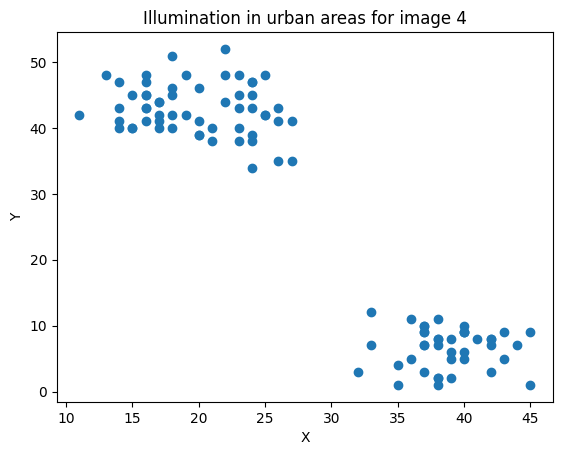

In [ ]:
coordinates_4 = np.array(formatted_data_8)
plt.scatter(coordinates_4[:, 0], coordinates_4[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Illumination in urban areas for image 4')
# plt.gca().invert_yaxis()

plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


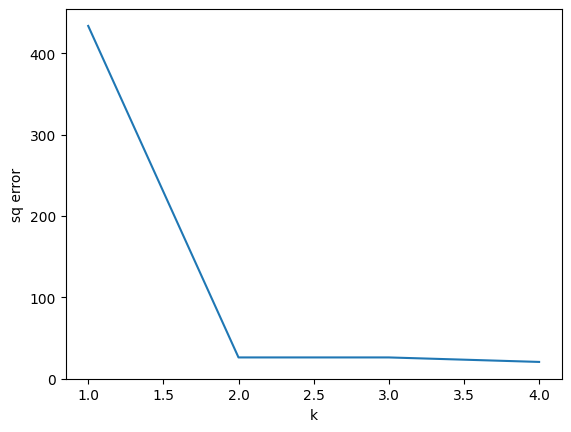

In [ ]:
def initialize_centeroids_4(k,iter = 2000):
    sum_x = np.zeros(k)
    sum_y = np.zeros(k)

    for i in range(iter):
        x_coor = np.random.uniform(10,50,k)
        y_coor = np.random.uniform(10,50,k)
        sum_x += x_coor
        sum_y += y_coor
    x_avg = sum_x/iter
    y_avg = sum_y/iter

    centroidS = np.column_stack((x_avg,y_avg))

    return centroidS

k_rng_4 = range(1,5)
costs_4 = []

for k in k_rng_4:
    Initial_centroids = initialize_centeroids_4(k)
    idx = find_closest_centroids(coordinates_4,Initial_centroids)
    centroids = compute_centroids(coordinates_4, idx , k)
    cost = calculate_cost(coordinates_4, centroids, idx)
    costs_4.append(cost)



plt.xlabel('k')
plt.ylabel('sq error')
plt.plot(k_rng_4,costs_4)

#Observing the Graph and manuall observation of the datapoints
## K Should be 2

In [ ]:
initial_centroids_4 = np.array([[20, 40],[40, 10]])  #guessing manually seeing the graph
idx_4 = find_closest_centroids(coordinates_4, initial_centroids_4)

K_4 = 2
centroids_4 = compute_centroids(coordinates_4, idx_4, K_4)

print("The centroids are:", centroids_4)

distances_4 = np.linalg.norm(coordinates_4[:, np.newaxis] - centroids_4, axis=2)

# assigning each data point to the cluster with the minimum distance
cluster_labels_4 = np.argmin(distances_4, axis=1)

print("Cluster Labels:", cluster_labels_4)

df_4 = pd.DataFrame(coordinates_4)
df_4['cluster'] = cluster_labels_4

The centroids are: [[19.78947368 42.87719298]
 [38.7804878   6.6097561 ]]
Cluster Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


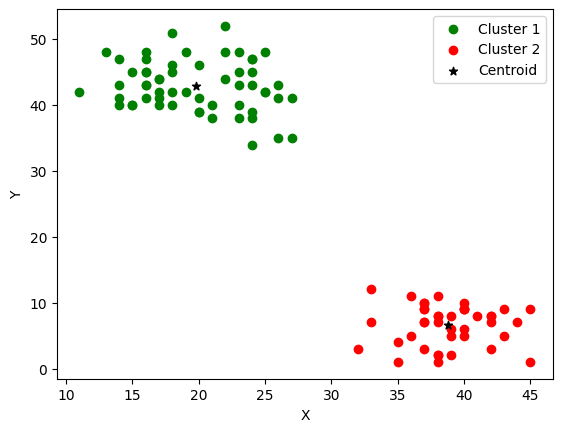

In [ ]:
plt.scatter(df_4[df_4['cluster'] == 0][0], df_4[df_4['cluster'] == 0][1], color='green', label='Cluster 1')
plt.scatter(df_4[df_4['cluster'] == 1][0], df_4[df_4['cluster'] == 1][1], color='red', label='Cluster 2')



plt.scatter(centroids_4[:, 0], centroids_4[:, 1], color='black', marker='*', label='Centroid')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
p_4 = np.array(centroids_4)
point_1_4 = p_4[0]
point_2_4 = p_4[1]


a_4 = np.sqrt(np.sum((point_1_4 - point_2_4)**2))


Distance_4 = np.array([a_4])
Clusters_4 = np.array(["cluster_1 and cluster_2"])
dict_4 = {'Clusters' : ["cluster_1 and cluster_2"],
        'Distances' : [a_4]}

Table_4 = pd.DataFrame(dict_4)

print(Table_4)


                  Clusters  Distances
0  cluster_1 and cluster_2  40.938803
